<a href="https://colab.research.google.com/github/403051814/skills-code-with-codespaces/blob/main/Lending_Club_Loan_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESCRIPTION**

Create a model that predicts whether or not a loan will be default using the historical data.

**Problem Statement:**

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

**Domain:** Finance

**Analysis to be done:** Perform data preprocessing and build a deep learning prediction model.

**Content: **

Dataset columns and definition:


*   credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
*   purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
*   int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

*   installment: The monthly installments owed by the borrower if the loan is funded.

*   log.annual.inc: The natural log of the self-reported annual income of the borrower.

*   dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

*   fico: The FICO credit score of the borrower.

*   days.with.cr.line: The number of days the borrower has had a credit line.

*   revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

*   revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

*   inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

*   delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

*   pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

**Steps to perform:**

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

**Tasks:**

1.     Feature Transformation

Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

Import all necessary libraries

In [57]:
# Add libraries as required
import pandas as pd
import scipy.stats as stats
import scipy as scy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import math
%matplotlib inline

Import the dataset

In [58]:
data = pd.read_csv('loan_data.csv')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Review the dataset information

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Check  if there are any null values

In [62]:
data.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

Review the dataset shape

In [63]:
data.shape

(9578, 14)

See the unique columns

In [64]:
data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

Check for duplicated entries

In [65]:
data[data.duplicated(keep=False)]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid


Identifying Categorical data

In [66]:
cat_var = []
for col in data.columns:
    if data[col].nunique()<=5:
        print("No of unique values for", col, "are :", data[col].nunique())
        print("Unique values in col ",col,"are :", data[col].unique())
        print("*"*100)
        cat_var.append(col)

No of unique values for credit.policy are : 2
Unique values in col  credit.policy are : [1 0]
****************************************************************************************************
No of unique values for not.fully.paid are : 2
Unique values in col  not.fully.paid are : [0 1]
****************************************************************************************************


In [67]:
for col in data.columns:
  print(data[col])


0       1
1       1
2       1
3       1
4       1
       ..
9573    0
9574    0
9575    0
9576    0
9577    0
Name: credit.policy, Length: 9578, dtype: int64
0       debt_consolidation
1              credit_card
2       debt_consolidation
3       debt_consolidation
4              credit_card
               ...        
9573             all_other
9574             all_other
9575    debt_consolidation
9576      home_improvement
9577    debt_consolidation
Name: purpose, Length: 9578, dtype: object
0       0.1189
1       0.1071
2       0.1357
3       0.1008
4       0.1426
         ...  
9573    0.1461
9574    0.1253
9575    0.1071
9576    0.1600
9577    0.1392
Name: int.rate, Length: 9578, dtype: float64
0       829.10
1       228.22
2       366.86
3       162.34
4       102.92
         ...  
9573    344.76
9574    257.70
9575     97.81
9576    351.58
9577    853.43
Name: installment, Length: 9578, dtype: float64
0       11.350407
1       11.082143
2       10.373491
3       11.350407
4      

Check the number of unique values in the categorical data found

In [68]:
data['purpose'].nunique()

7

List the unique values

In [69]:
data['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

Duplicate the dataset to maintain original

In [70]:
data1=data

Label Encoding categorical data

In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1['purpose'] = le.fit_transform(data1['purpose'])
data1

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


Get sumary statistics for the data

In [72]:
data1.describe()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,1.944038,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,1.686881,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,6.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Data Visualization



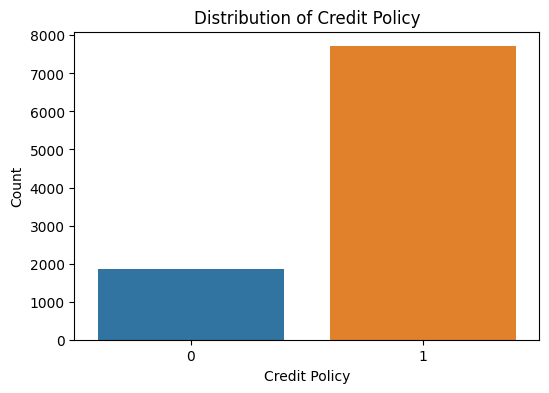

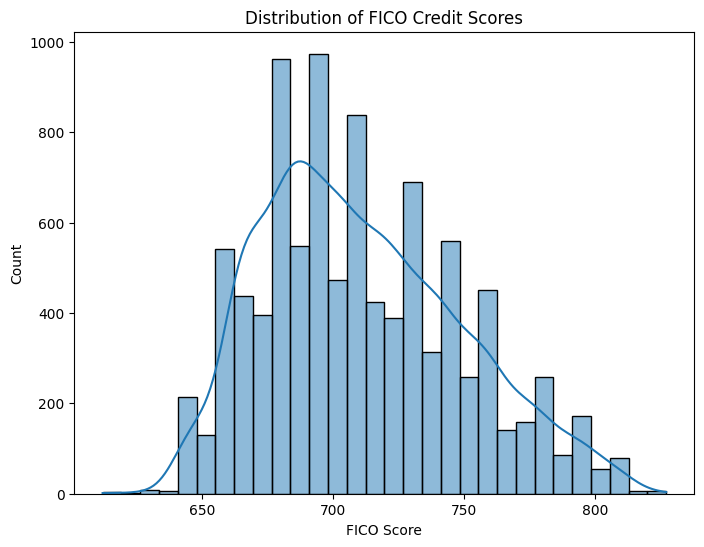

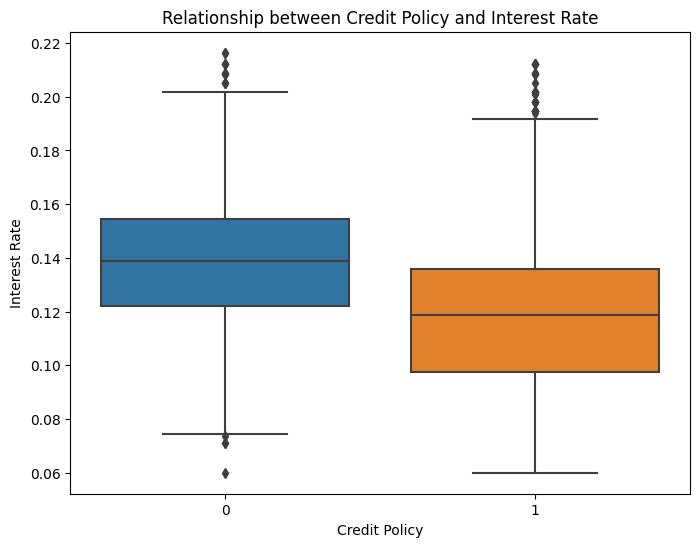

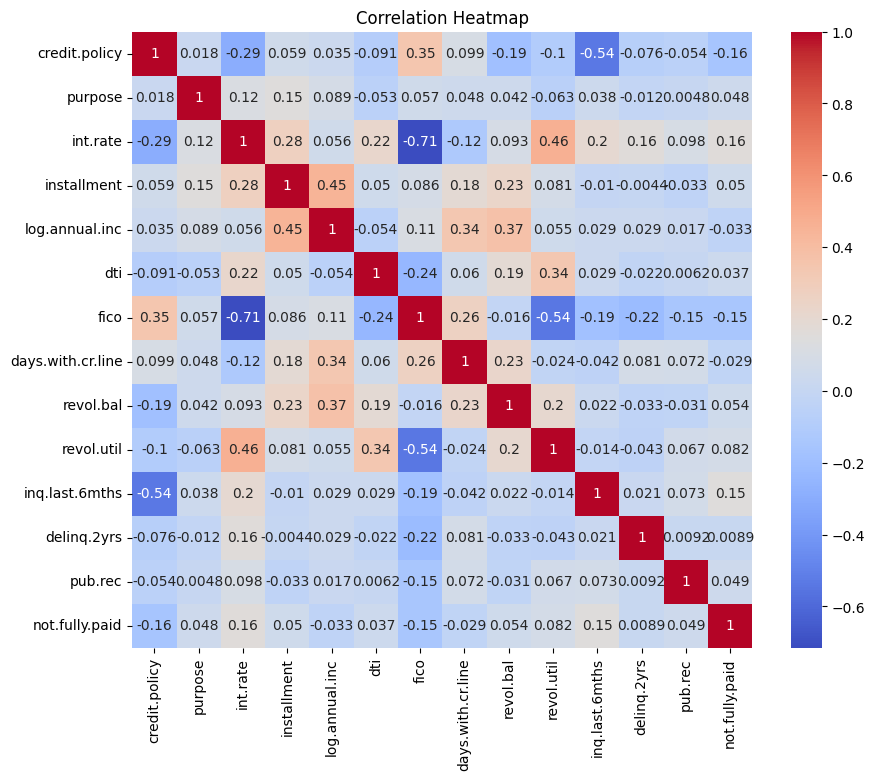

In [83]:
# Distribution of the target variable (credit.policy)
plt.figure(figsize=(6, 4))
sns.countplot(x='credit.policy', data=data1)
plt.title('Distribution of Credit Policy')
plt.xlabel('Credit Policy')
plt.ylabel('Count')
plt.show()

# Distribution of FICO credit scores
plt.figure(figsize=(8, 6))
sns.histplot(data=data1, x='fico', bins=30, kde=True)
plt.title('Distribution of FICO Credit Scores')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.show()

# Relationship between credit.policy and int.rate
plt.figure(figsize=(8, 6))
sns.boxplot(x='credit.policy', y='int.rate', data=data1)
plt.title('Relationship between Credit Policy and Interest Rate')
plt.xlabel('Credit Policy')
plt.ylabel('Interest Rate')
plt.show()

# Correlation heatmap
correlation_matrix = data1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Feature relationship analisys

In [75]:
# Set a correlation threshold for feature selection
correlation_threshold = 0.7

# Find features with high correlation
highly_correlated = []
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[(correlation_matrix[col] > correlation_threshold) & (correlation_matrix[col] < 1)]
    for correlated_col in correlated_cols:
        if correlated_col not in highly_correlated:
            highly_correlated.append(correlated_col)

# Drop highly correlated features
data1.drop(columns=highly_correlated, inplace=True)

# Display the remaining features
print("Remaining features after dropping highly correlated ones:")
print(data1.columns)


Remaining features after dropping highly correlated ones:
Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')


Model development

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load your preprocessed dataset into a DataFrame (assuming 'df' is your DataFrame)
# df = pd.read_csv('preprocessed_dataset.csv')

# Separate features and target variable
X = data1.drop('credit.policy', axis=1)
y = data1['credit.policy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the deep learning model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob >= 0.5).astype(int)  # Apply a threshold of 0.5 to get class labels

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Epoch 1/10
192/192 [==============================] - 2s 5ms/step - loss: 0.4630 - accuracy: 0.8093 - val_loss: 0.2929 - val_accuracy: 0.8995
Epoch 2/10
192/192 [==============================] - 1s 4ms/step - loss: 0.3376 - accuracy: 0.8623 - val_loss: 0.2465 - val_accuracy: 0.9106
Epoch 3/10
192/192 [==============================] - 1s 3ms/step - loss: 0.2989 - accuracy: 0.8835 - val_loss: 0.2311 - val_accuracy: 0.9126
Epoch 4/10
192/192 [==============================] - 0s 3ms/step - loss: 0.2865 - accuracy: 0.8881 - val_loss: 0.2239 - val_accuracy: 0.9191
Epoch 5/10
192/192 [==============================] - 0s 3ms/step - loss: 0.2715 - accuracy: 0.8920 - val_loss: 0.2181 - val_accuracy: 0.9204
Epoch 6/10
192/192 [==============================] - 1s 3ms/step - loss: 0.2685 - accuracy: 0.8928 - val_loss: 0.2114 - val_accuracy: 0.9237
Epoch 7/10
192/192 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.9018 - val_loss: 0.2096 - val_accuracy: 0.9217
Epoch 

Predictions using model

In [91]:
# Sample input data (replace with your own data)
# int.rate, fico, installment, log.annual.inc, dti, days.with.cr.line, revol.bal, revol.util, inq.last.6mths, delinq.2yrs, pub.rec
new_data = np.array([[2, 0.12, 829, 11.3, 19.5, 737, 5640, 28854, 52.1, 0, 0, 0, 0]])

# Standardize the new input data using the same scaler as before
new_data_scaled = scaler.transform(new_data)

# Make predictions
predictions = model.predict(new_data_scaled)
predicted_classes = (predictions >= 0.5).astype(int)

print("Predicted Probabilities:", predictions)
print("Predicted Classes:", predicted_classes)

1/1 [==============================] - 0s 68ms/step
Predicted Probabilities: [[0.9991963]]
Predicted Classes: [[1]]
